# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [239]:
# importação dos módulos

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

In [240]:
# abrindo o arquivo e transformando-o em DF

arquivo = pd.read_csv('demo01.csv')

df = pd.DataFrame(arquivo)

df.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16649,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


* As colunas estão ordenadas perfeitamente, não havendo necessidade de reindexar o índice.

In [241]:
# variáveis (colunas)

df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [242]:
# informação sobre os dados faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [243]:
# tamanho

df.shape

(16650, 16)

* Nota-se que não há dados faltantes. Todos possuem 1650 informações, ou 1649, já que a primeira é a linha das colunas.

In [244]:
# eliminando os duplicados, caso haja

df = df.drop_duplicates()

# verificando se ficou algum duplicado

df.duplicated().any()

False

In [245]:
# reindexando e verificando quantas linhas sobraram

df.reindex()

df.shape

(6770, 16)

In [246]:
# verificando a distribuição da variável 'mau'

mau = df['mau'].value_counts()
mau

False    6472
True      298
Name: mau, dtype: int64

In [247]:
# com o sum() se verifica quantos são os retornos do True

df['mau'].sum()

298

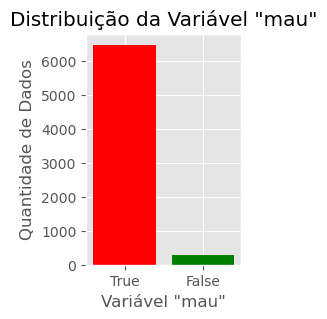

In [248]:
# plotando gráfico de barras com a distribução do 'mau'

plt.figure(figsize=(2,3))
plt.bar(['True', 'False'], df['mau'].value_counts(), color=['red', 'green'])

# adicionar rótulos aos eixos
plt.xlabel('Variável "mau"')
plt.ylabel('Quantidade de Dados')

# título
plt.title('Distribuição da Variável "mau"')

plt.show()


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [249]:
# lista vazia
df_var = {'nome_variavel': [], 'tipo_dado': [], 'qtd_categorias': []}

# for in ao longo dos nomes

for coluna in df.columns:
    df_var['nome_variavel'].append(coluna) 
    df_var['tipo_dado'].append(df[coluna].dtype)
    if df[coluna].dtype == 'object':
        df_var['qtd_categorias'].append(len(df[coluna].unique()))
    else:
        df_var['qtd_categorias'].append(len(df[coluna].unique()))


# aplicação
df_var = pd.DataFrame(df_var)

df_var


,nome_variavel,tipo_dado,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


* Há 7 variáveis com somente 2 categorias:
    - sexo, no arquivo, só há dois (M, F). Podemos ajustar para 0 = M e 1 = F;
    - posse_veiculo só há duas categorias, que iremos transformar em Y = 1 e N = 0;
    - posse_imovel, possui_fone_comercial, possui_fone e possui_email seguem a lógica anterior;
    - note que todos os cadastros informam possuir celular, o que resume em 1 só categoria. Mesmo assim, deixaremos como 1.

In [250]:
df.head(2)
df['possui_celular'].value_counts()

1    6770
Name: possui_celular, dtype: int64

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [251]:
# variáveis dummy para as variáveis qualitativas

df_dummy = pd.get_dummies(df, columns=['sexo', 
                                       'posse_de_veiculo', 
                                       'posse_de_imovel', 
                                       'possui_fone_comercial', 
                                       'possui_fone', 
                                       'possui_email','mau', 'possui_celular'])
#exibindo
df_dummy.head()

,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,sexo_F,sexo_M,...,posse_de_imovel_Y,possui_fone_comercial_0,possui_fone_comercial_1,possui_fone_0,possui_fone_1,possui_email_0,possui_email_1,mau_False,mau_True,possui_celular_1
0,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,2.0,0,1,...,1,1,0,1,0,1,0,1,0,1
1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1.0,1,0,...,1,1,0,0,1,0,1,1,0,1
3,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,2.0,0,1,...,1,0,1,0,1,0,1,1,0,1
4,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,2.0,1,0,...,0,1,0,1,0,1,0,1,0,1
6,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,2.0,1,0,...,1,1,0,0,1,1,0,1,0,1


In [252]:
# excluindo as colunas desnecessárias

excluir = ['qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 
           'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']

df_dummy = df_dummy.drop(columns = excluir)

# exibindo o novo DF

df_dummy.head()

,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y,possui_fone_comercial_0,possui_fone_comercial_1,possui_fone_0,possui_fone_1,possui_email_0,possui_email_1,mau_False,mau_True,possui_celular_1
0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1
1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1
3,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1
4,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1
6,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [253]:
df['possui_email'].value_counts()


0    6205
1     565
Name: possui_email, dtype: int64

Tabela Cruzada:
                   Não possui veículo (mau=1)  Possui veículo (mau=1)  Total
Não possui e-mail                         182                      96    278
Possui e-mail                               8                      12     20
Total                                     190                     108    298




<Figure size 1000x600 with 0 Axes>

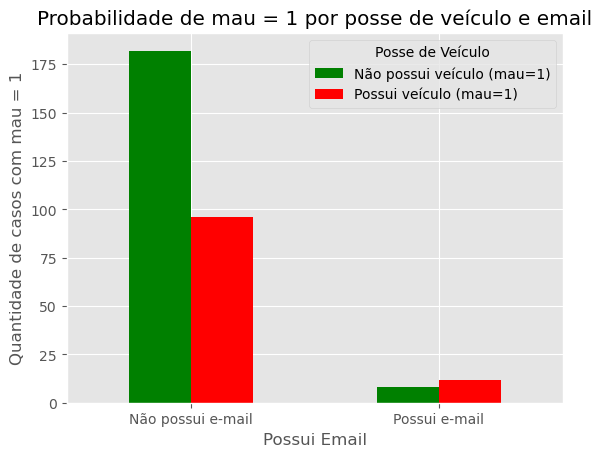

In [254]:
# Criando a tabela cruzada com a contagem de 'mau' igual a 1 para cada combinação das variáveis possui_email e posse_de_veiculo
tabela_cruzada_mau = pd.crosstab(index=df['possui_email'], columns=df['posse_de_veiculo'],
                                 values=(df['mau'] == True), aggfunc='sum', margins=True, margins_name='Total')

# Renomeando as colunas
tabela_cruzada_mau.columns = ['Não possui veículo (mau=1)', 'Possui veículo (mau=1)', 'Total']

# Renomeando o index
tabela_cruzada_mau.index = ['Não possui e-mail', 'Possui e-mail', 'Total']

# Exibindo a tabela cruzada
print("Tabela Cruzada:")
print(tabela_cruzada_mau)
print("\n")

# Plotando um gráfico de barras para melhor compreensão
plt.figure(figsize=(10, 6))
tabela_cruzada_mau.drop('Total', axis=0).drop('Total', axis=1).plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title('Probabilidade de mau = 1 por posse de veículo e email')
plt.xlabel('Possui Email')
plt.ylabel('Quantidade de casos com mau = 1')
plt.xticks(rotation=0)
plt.legend(title='Posse de Veículo')
plt.show()

 - Dado o gráfico acima plotado, é compreensível que a varivável 'não possuir veículo' seja mais apropriada para avaliar o risco de mau = 1.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [258]:
# salvando o DF original alterado
df.to_csv('base_de_dados.csv')

In [ ]:
# salvando o DF alterado Dummy
df.to_csv('base_de_dados_dummy')